In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data.csv')
df=df.drop(['map_size','h_cache','mdd_cache'], axis=1)
df[['cpu_time','h_time','mdd_time','emvc_mvc_time','root_h_val','expanded','generated']] = df[['cpu_time','h_time','mdd_time','emvc_mvc_time','root_h_val','expanded','generated']].where(lambda df: df['expanded']!=0, np.nan)
df['search_time'] = df['cpu_time']-df['h_time']-df['mdd_time']
df['graph_time'] = df['h_time']-df['emvc_mvc_time']
df

,num_agents,density,disjoint,heuristic,time_limit,cpu_time,h_time,emvc_mvc_time,root_h_val,mdd_time,expanded,generated,search_time,graph_time
0,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,25,0.3,False,wdg,120.0,50.44664,44.182916,43.259056,10.0,0.463956,348.0,695.0,5.799767,0.923861
4070,25,0.3,False,wdg,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4071,25,0.3,False,wdg,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4072,25,0.3,False,wdg,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# df[(df['expanded']!=0) & (df['heuristic']=='wdg') & (df['disjoint']==False)]
df['finished'] = (df['expanded'].notna())

In [4]:
groups = df.groupby(['num_agents','density','heuristic','disjoint','time_limit'],as_index=False).mean()
# groups[(groups['density']==0.) & (groups['time_limit']==time_limit)]
# groups['success_rate'] = groups['finished']/20
groups

,num_agents,density,heuristic,disjoint,time_limit,cpu_time,h_time,emvc_mvc_time,root_h_val,mdd_time,expanded,generated,search_time,graph_time,finished
0,10,0.0,cg,False,60.0,0.587501,0.008610,0.0,0.0,0.161119,168.944444,336.888889,0.417773,0.008610,0.9
1,10,0.0,cg,True,60.0,0.303049,0.024810,0.0,0.0,0.111509,35.600000,56.850000,0.166730,0.024810,1.0
2,10,0.0,dg,False,60.0,0.081304,0.010854,0.0,0.2,0.053004,5.850000,10.700000,0.017446,0.010854,1.0
3,10,0.0,dg,True,60.0,0.067646,0.005994,0.0,0.2,0.049552,3.700000,6.200000,0.012100,0.005994,1.0
4,10,0.0,wdg,False,60.0,0.141757,0.055994,0.0,0.2,0.069406,5.850000,10.700000,0.016358,0.055994,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,50,0.4,cg,True,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
200,50,0.4,dg,False,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
201,50,0.4,dg,True,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
202,50,0.4,wdg,False,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
# Dense Graph
def success_rate_graph(density, max_agents=50, time_limit=60 ,x_interval=10, size=(6,5), file=None):
    dense = groups[(groups['density']==density) & (groups['time_limit']==time_limit)]
    disjoint_settings = [True,False]
    heuristics_settings = ['cg','dg','wdg']
    plt.figure(figsize=size)
    ls=['-','--','-.']
    for d in disjoint_settings:
        i=0
        for h in heuristics_settings:
            view = dense[(dense['disjoint']==d) & (dense['heuristic']==h) & (dense['num_agents']<=max_agents) & (dense['num_agents']!=17)]
            name = h.upper()+'_disjoint' if d else h.upper()
            plt.plot(view['num_agents'], view['finished'], label=name, marker='o',alpha=0.7, linestyle=ls[i%3])
            i+=1
    plt.legend()
    plt.xlabel('Agents')
    plt.ylabel('Success Rate')
    plt.xticks(np.arange(10, max_agents, x_interval))
    if file:
        plt.savefig(file)
    plt.show()

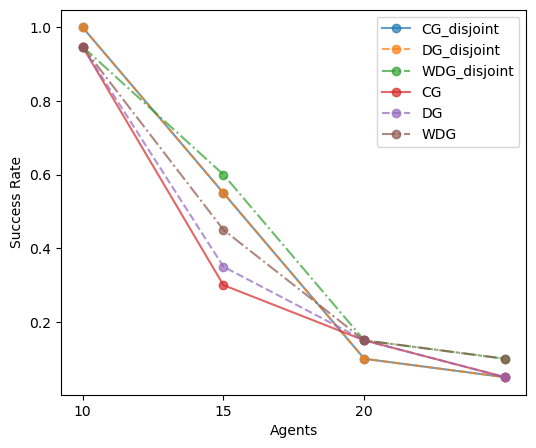

In [6]:
success_rate_graph(0.3, 25, 120, 5, file='./plots/success_03.png')
# success_rate_graph(0.3, 25, 120, 5)

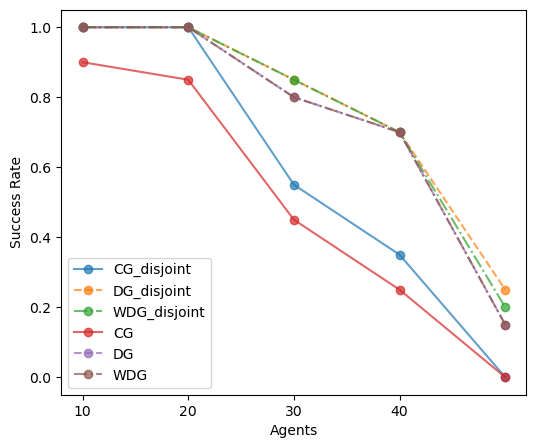

In [7]:
success_rate_graph(0, 50, 60, 10, file='./plots/success_00.png')

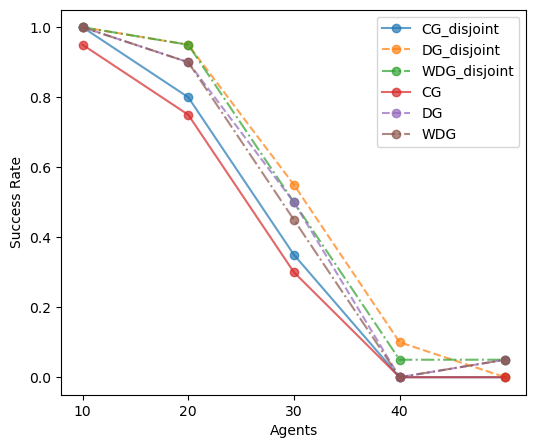

In [8]:
success_rate_graph(0.1,50,60,10, file='./plots/success_01.png')

## Mutually Solvable instances

In [9]:
df=pd.read_csv('solvable.csv')
df=df.drop(['map_size','h_cache','mdd_cache'], axis=1)
df[['cpu_time','h_time','mdd_time','emvc_mvc_time','root_h_val','expanded','generated']] = df[['cpu_time','h_time','mdd_time','emvc_mvc_time','root_h_val','expanded','generated']].where(lambda df: df['expanded']!=0, np.nan)
df['search_time'] = df['cpu_time']-df['h_time']-df['mdd_time']
df['graph_time'] = df['h_time']-df['emvc_mvc_time']
df['count']=1
df

,num_agents,density,disjoint,heuristic,time_limit,cpu_time,h_time,emvc_mvc_time,root_h_val,mdd_time,expanded,generated,search_time,graph_time,count
0,10,0.0,True,cg,60.0,0.066982,0.000000,0.000000,0.0,0.051318,2.0,3.0,0.015664,0.000000,1
1,10,0.0,True,cg,60.0,0.046874,0.000000,0.000000,0.0,0.031251,2.0,3.0,0.015623,0.000000,1
2,10,0.0,True,cg,60.0,0.038928,0.000000,0.000000,0.0,0.032036,1.0,1.0,0.006891,0.000000,1
3,10,0.0,True,cg,60.0,0.063105,0.000000,0.000000,0.0,0.062104,2.0,3.0,0.001001,0.000000,1
4,10,0.0,True,cg,60.0,0.077986,0.001000,0.000000,0.0,0.053989,11.0,18.0,0.022997,0.001000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,10,0.4,False,wdg,60.0,2.893013,0.614900,0.014004,4.0,0.450118,336.0,671.0,1.827996,0.600895,1
1088,10,0.4,False,wdg,60.0,1.232007,0.489043,0.016000,6.0,0.331986,67.0,133.0,0.410977,0.473043,1
1089,10,0.4,False,wdg,60.0,20.391003,9.168118,0.072997,8.0,3.799142,805.0,1609.0,7.423742,9.095121,1
1090,10,0.4,False,wdg,60.0,15.701999,5.854232,0.793011,6.0,3.060818,1947.0,3893.0,6.786948,5.061221,1


In [10]:
groups = df.groupby(['heuristic', 'disjoint', 'num_agents','density','time_limit'], as_index=False).sum()
for c in groups.columns[5:-1]:
    groups[c]=groups[c]/groups['count']
groups.columns[5:-1]
groups

,heuristic,disjoint,num_agents,density,time_limit,cpu_time,h_time,emvc_mvc_time,root_h_val,mdd_time,expanded,generated,search_time,graph_time,count
0,cg,False,10,0.0,60.0,0.587501,0.008610,0.000000,0.000000,0.161119,168.944444,336.888889,0.417773,0.008610,18
1,cg,False,10,0.1,60.0,0.365419,0.015839,0.000053,0.210526,0.091105,91.000000,181.000000,0.258475,0.015787,19
2,cg,False,10,0.2,60.0,0.519654,0.067000,0.000200,0.650000,0.251255,28.350000,55.700000,0.201399,0.066800,20
3,cg,False,10,0.3,60.0,1.123682,0.114119,0.005949,1.631579,0.316894,140.105263,279.210526,0.692670,0.108169,19
4,cg,False,10,0.3,120.0,0.958801,0.103177,0.003810,1.666667,0.285568,147.611111,294.222222,0.570056,0.099367,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,wdg,True,20,0.3,120.0,10.006719,7.109088,3.253200,10.000000,1.730960,102.000000,191.500000,1.166672,3.855887,2
98,wdg,True,25,0.3,120.0,19.735479,4.018469,2.080003,6.000000,1.750062,904.000000,1782.000000,13.966949,1.938466,1
99,wdg,True,30,0.0,60.0,1.262218,0.287533,0.000222,0.444444,0.406964,26.000000,50.222222,0.567721,0.287310,9
100,wdg,True,30,0.1,60.0,4.048063,0.827290,0.026510,3.000000,0.590701,130.833333,253.000000,2.630072,0.800780,6


In [11]:
groups[(groups['density']==0) & (groups['num_agents']<50) & (groups['disjoint']==True)].pivot(index=['num_agents'], columns=['heuristic'], values=['root_h_val'])

root_h_val                    
heuristic          cg        dg       wdg
num_agents                               
10           0.000000  0.111111  0.111111
20           0.117647  0.294118  0.411765
30           0.222222  0.222222  0.444444
40           1.000000  1.750000  2.000000

In [12]:
groups[(groups['density']==0.3) & (groups['num_agents']<=20) & (groups['disjoint']==True) & (groups['time_limit']==120)].pivot(index=['num_agents'], columns=['heuristic'], values=['root_h_val'])

root_h_val                     
heuristic          cg        dg        wdg
num_agents                                
10           1.666667  1.666667   3.555556
15           2.500000  2.500000   5.000000
17           4.000000  4.000000   9.333333
20           4.500000  4.500000  10.000000

In [13]:
groups[(groups['density']==0.1) & (groups['num_agents']<=40) & (groups['disjoint']==True)].pivot(index=['num_agents'], columns=['heuristic'], values=['root_h_val'])

root_h_val                    
heuristic          cg        dg       wdg
num_agents                               
10           0.210526  0.368421  0.526316
20           0.400000  0.600000  0.933333
30           1.666667  1.666667  3.000000

In [14]:
groups[(groups['num_agents']==20) & (groups['density']<=0.3) & (groups['disjoint']==True) & (groups['time_limit']==60)].pivot(index=['density'], columns=['heuristic'], values=['root_h_val'])

root_h_val                     
heuristic         cg        dg        wdg
density                                  
0.0         0.117647  0.294118   0.411765
0.1         0.400000  0.600000   0.933333
0.2         2.142857  2.285714   5.000000
0.3         4.500000  4.500000  10.000000

In [15]:
groups1 = groups[((groups['density'] == 0) | (groups['density'] == 0.1) | ((groups['density']==0.3) & (groups['time_limit']==120))) & (groups['disjoint']==True) & (groups['num_agents']<=20)].groupby(['heuristic','density'], as_index=False).mean()
groups1 = groups1.set_index('heuristic')
groups1

,density,disjoint,num_agents,time_limit,cpu_time,h_time,emvc_mvc_time,root_h_val,mdd_time,expanded,generated,search_time,graph_time,count
heuristic,,,,,,,,,,,,,,
cg,0.0,True,15.0,60.0,0.348631,0.011804,0.000118,0.058824,0.108589,29.232026,56.388889,0.228238,0.011686,17.50
cg,0.1,True,15.0,60.0,1.098413,0.032213,0.000166,0.305263,0.154970,94.964912,184.431579,0.911231,0.032046,17.00
cg,0.3,True,15.5,120.0,3.506841,1.336528,1.104671,3.166667,0.603073,187.555556,353.666667,1.567240,0.231857,7.25
dg,0.0,True,15.0,60.0,0.198261,0.033714,0.000059,0.202614,0.101161,7.325163,13.593137,0.063386,0.033655,17.50
dg,0.1,True,15.0,60.0,0.617688,0.050080,0.000560,0.484211,0.115878,44.498246,87.063158,0.451730,0.049521,17.00
dg,0.3,True,15.5,120.0,4.052768,1.675620,1.162505,3.166667,0.546046,199.472222,376.625000,1.831103,0.513115,7.25
wdg,0.0,True,15.0,60.0,0.204254,0.038817,0.000059,0.261438,0.102168,7.486928,13.598039,0.063268,0.038758,17.50
wdg,0.1,True,15.0,60.0,0.771180,0.111148,0.001205,0.729825,0.160997,45.529825,89.126316,0.499035,0.109943,17.00
wdg,0.3,True,15.5,120.0,4.834850,2.902649,1.121041,6.972222,0.926877,129.541667,235.111111,1.005324,1.781608,7.25


In [16]:
# groups1 = groups[(groups['density']==0.3) & (groups['time_limit']==60) & (groups['disjoint']==True) & (groups['num_agents']<=20)].groupby(['heuristic','density'], as_index=False).mean()
# groups1 = groups1.set_index('heuristic')
# groups1

In [17]:
groups1['CBS'] = groups1['search_time']/groups1['expanded']*1000
groups1['Solve MVC/EWMVC'] = groups1['emvc_mvc_time']/groups1['expanded']*1000
groups1['Calculate MDD'] = groups1['mdd_time']/groups1['expanded']*1000
groups1['Compute Graph'] = groups1['graph_time']/groups1['expanded']*1000

In [18]:
groups1.drop(groups1.columns.difference(['density','CBS','Solve MVC/EWMVC','Calculate MDD','Compute Graph']), 1, inplace=True)
# groups1 = groups1[[]]

In [19]:
def runtime_chart(density, size=(8,6), file=None):
    plt.figure(figsize=size)
    groups1[groups1['density']==density].drop('density',axis=1).plot(kind='bar', stacked=True)
    plt.ylabel('Runtime per node (ms)')
    ax = plt.gca()
    ax.set_ylim([0, 40])
    plt.legend(loc=2)
    if file:
        plt.savefig(file)
    plt.show()

<Figure size 800x600 with 0 Axes>

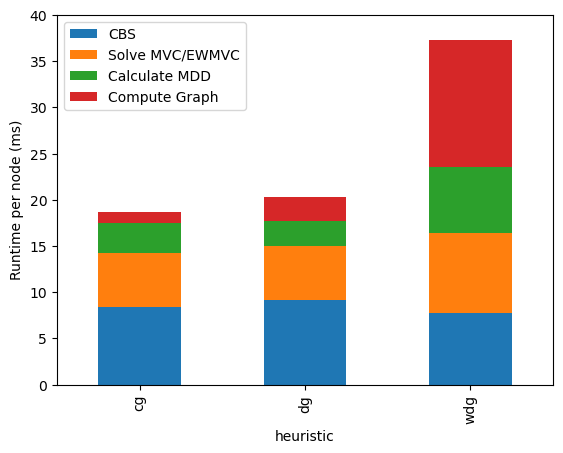

In [20]:
runtime_chart(0.3, file='./plots/runtime_03.png')

<Figure size 800x600 with 0 Axes>

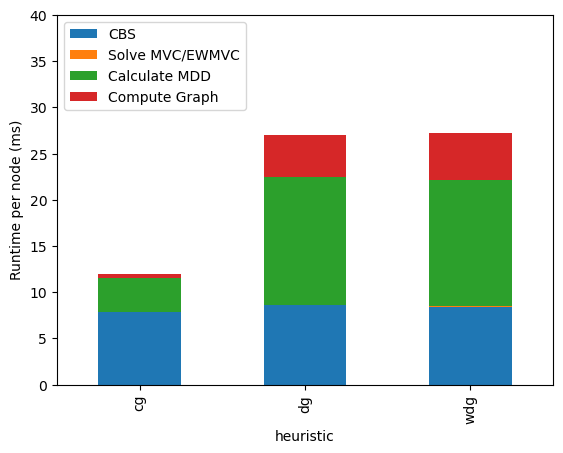

In [21]:
runtime_chart(0, file='./plots/runtime_00.png')

<Figure size 800x600 with 0 Axes>

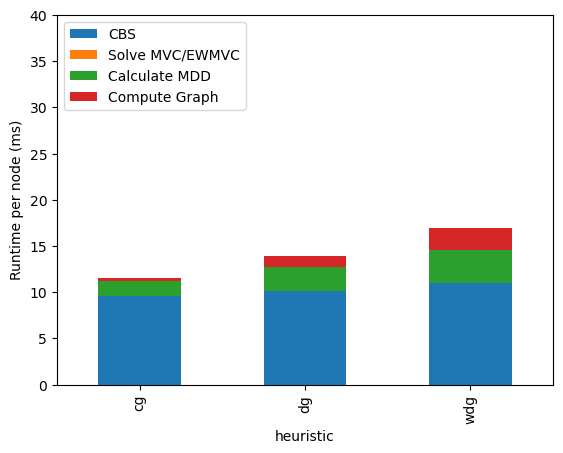

In [22]:
runtime_chart(0.1, file='./plots/runtime_01.png')